In [2]:
import pandas as pd
df = pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("---Informacion General---")
df.info()
print("\n---Estadisticas---")
print(df.describe())

---Informacion General---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [6]:
import numpy as np
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print(f"Valores nulos en TotalCharges: {df['TotalCharges'].isnull().sum()}")

df.dropna(inplace=True)

Valores nulos en TotalCharges: 11


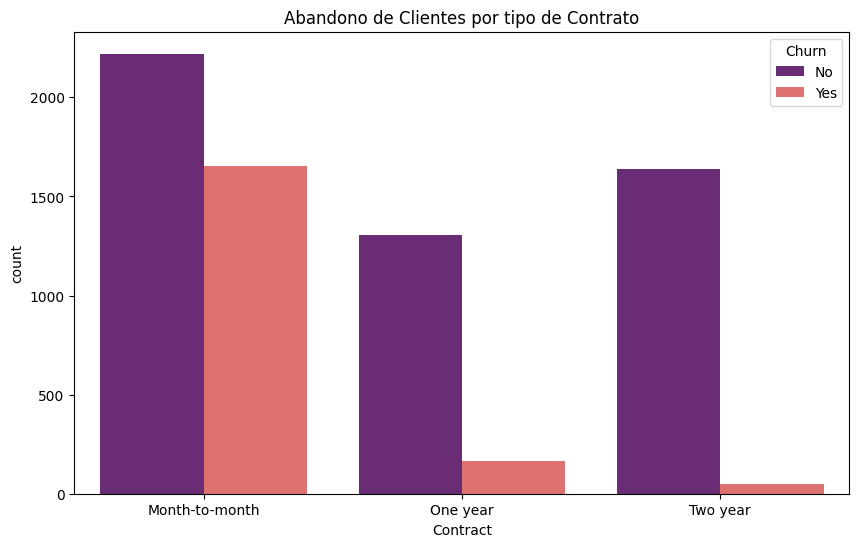

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x="Contract", hue="Churn", data=df, palette="magma")
plt.title("Abandono de Clientes por tipo de Contrato")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columnas_binarias = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in columnas_binarias:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df,columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])
df.drop("customerID", axis=1, inplace=True)
print("Nuevas dimensiones de la tabla:", df.shape)
df.head()

Nuevas dimensiones de la tabla: (7032, 41)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Datos totales para entrenar: {len(X_train)}")
print(f"Datos totales para probar: {len(X_test)}")

Datos totales para entrenar: 5625
Datos totales para probar: 1407


In [10]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
print("Modelo entrenado con exito.")

Modelo entrenado con exito.


---Reporte de Clasificacion---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



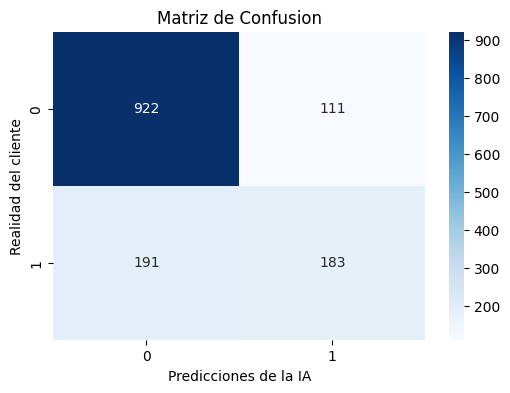

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
predicciones = modelo.predict(X_test)
print("---Reporte de Clasificacion---")
print(classification_report(y_test, predicciones))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones de la IA")
plt.ylabel("Realidad del cliente")
plt.title("Matriz de Confusion")
plt.show()

/tmp/ipython-input-1398545237.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=importancia_df, palette="viridis")


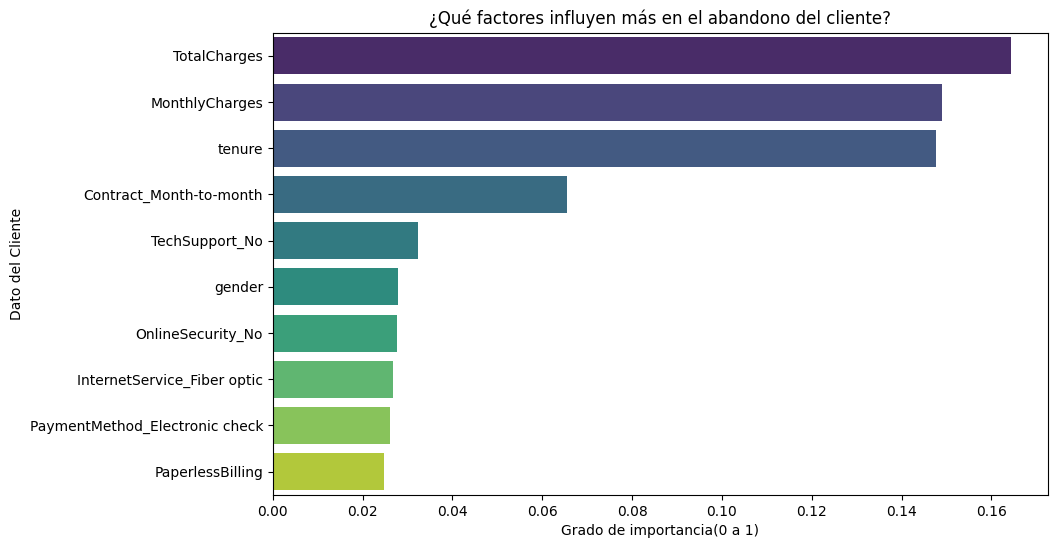

In [12]:
importancias = modelo.feature_importances_
nombres_columnas = X.columns

importancia_df = pd.DataFrame({"Característica":nombres_columnas, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Característica', data=importancia_df, palette="viridis")
plt.title("¿Qué factores influyen más en el abandono del cliente?")
plt.xlabel("Grado de importancia(0 a 1)")
plt.ylabel("Dato del Cliente")
plt.show()
